In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('salary_data.csv')
X = df['YearsExperience'].values.astype(float)
y = df['Salary'].values.astype(float)


In [3]:
m = len(X)
split = int(0.8 * m)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [4]:
X_mean = X_train.mean()
X_std = X_train.std() if X_train.std() != 0 else 1.0
X_train_s = (X_train - X_mean) / X_std
X_test_s = (X_test - X_mean) / X_std


In [5]:
def predict(X, w, b):
    return w * X + b


def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    if ss_tot == 0:
        return 0.0
    return 1 - ss_res / ss_tot



In [6]:
def gradient_descent(X, y, lr, epochs, w0=0.0, b0=0.0):
    w, b = w0, b0
    ws, bs, costs = [], [], []
    m = len(X)
    for _ in range(epochs):
        y_pred = predict(X, w, b)
        error = y_pred - y
        dw = (2 / m) * np.dot(error, X)
        db = (2 / m) * np.sum(error)
        w -= lr * dw
        b -= lr * db
        ws.append(w)
        bs.append(b)
        costs.append(mse(y, y_pred))
    return w, b, ws, bs, costs



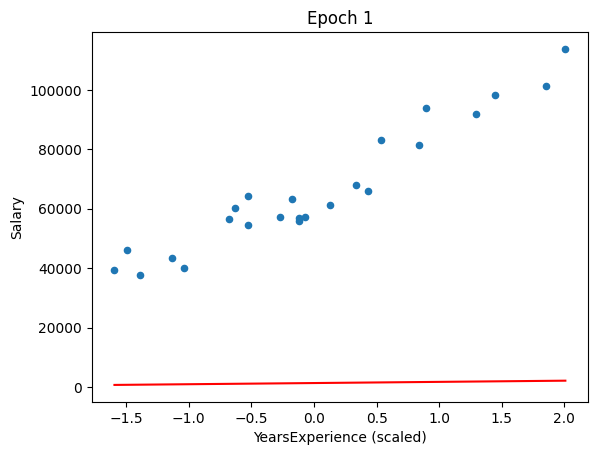

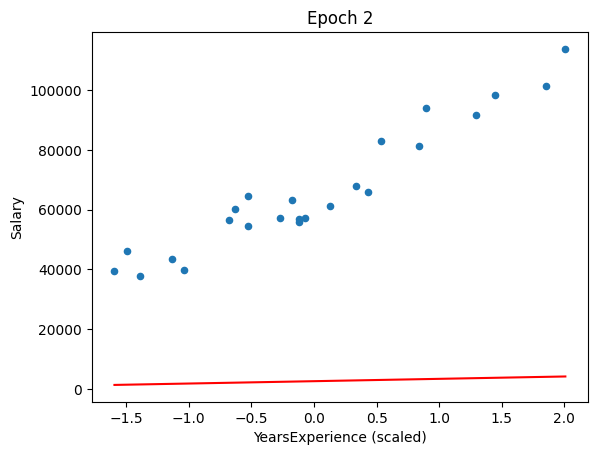

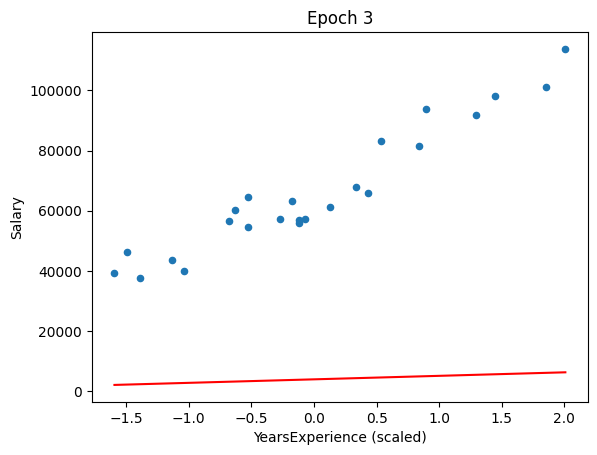

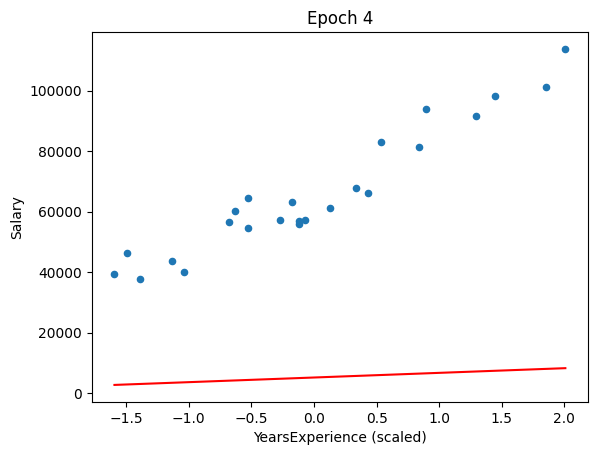

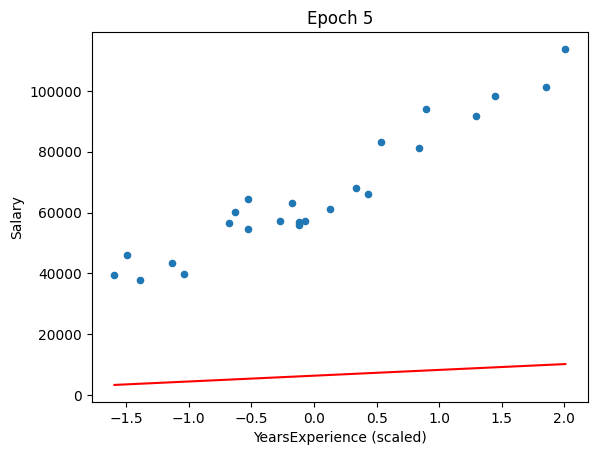

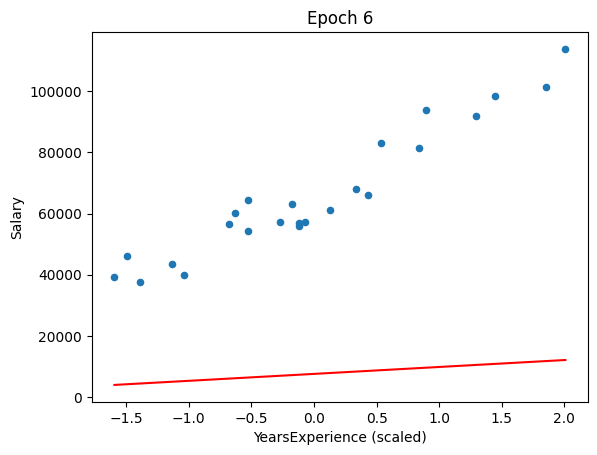

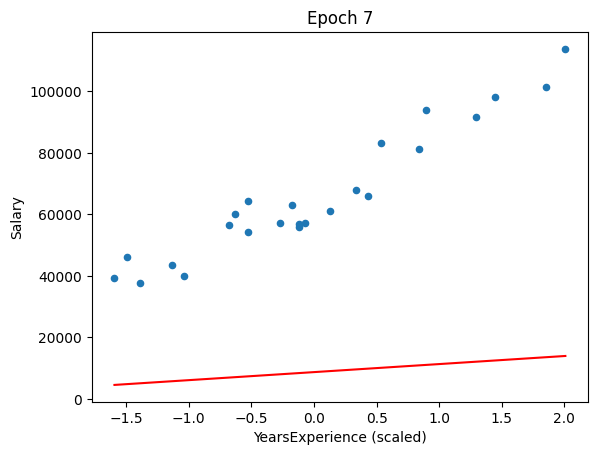

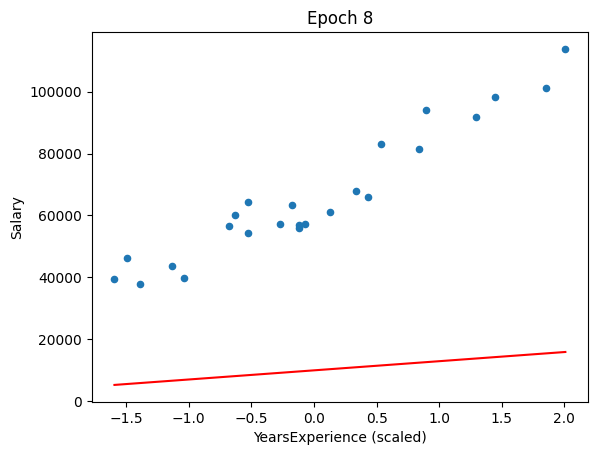

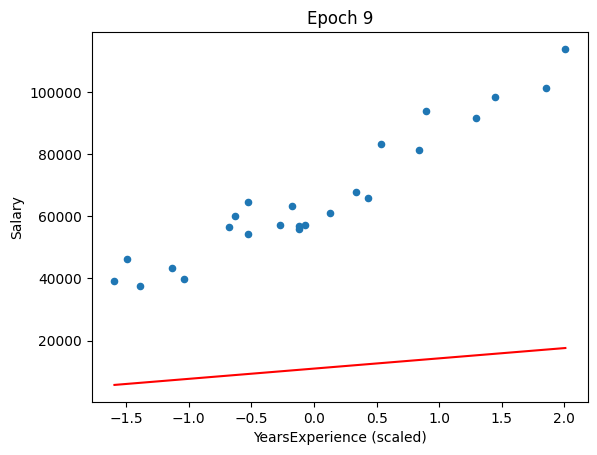

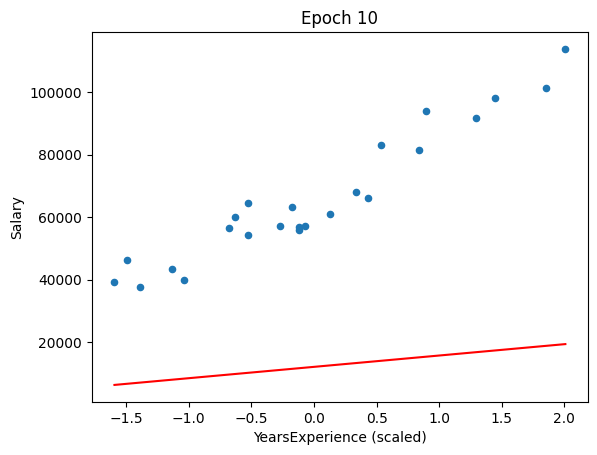

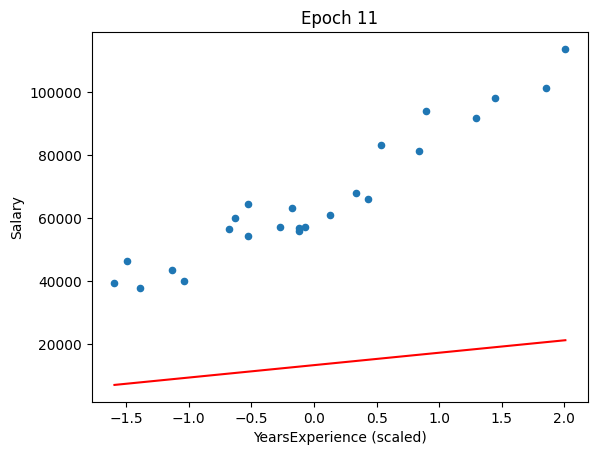

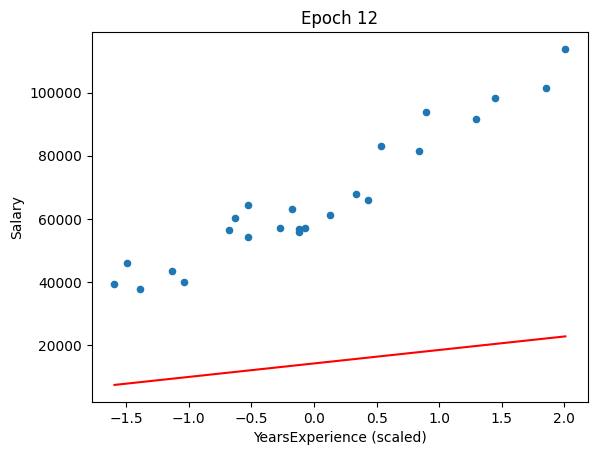

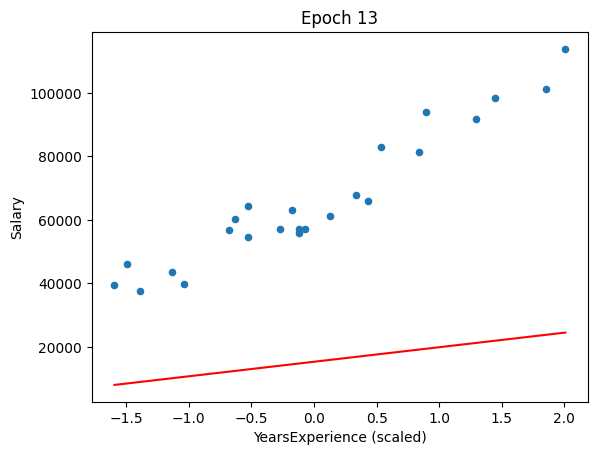

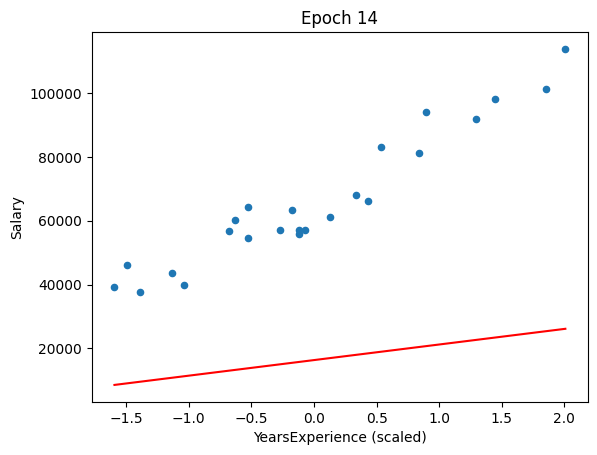

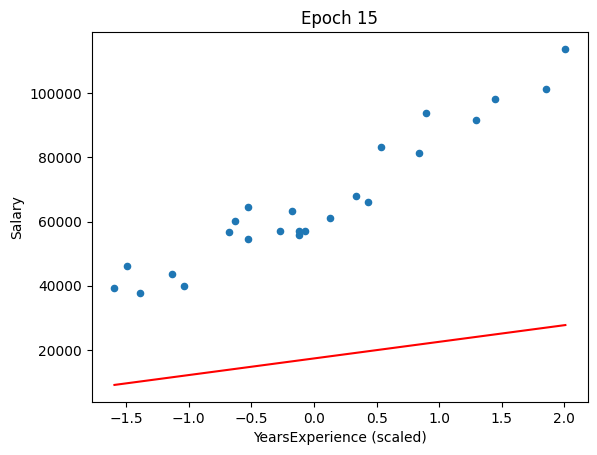

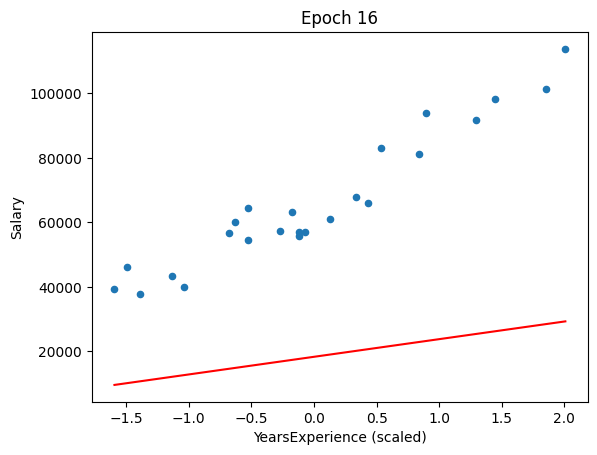

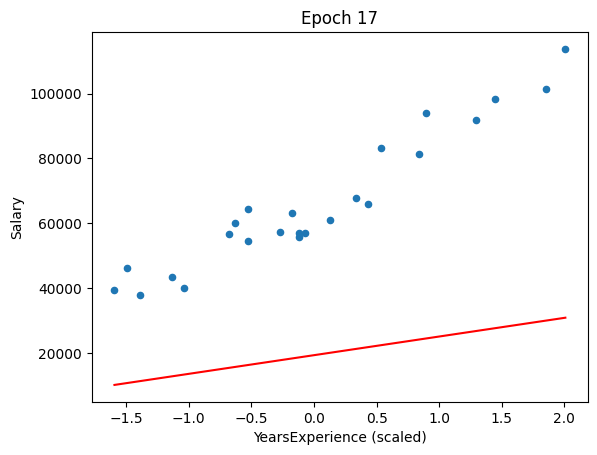

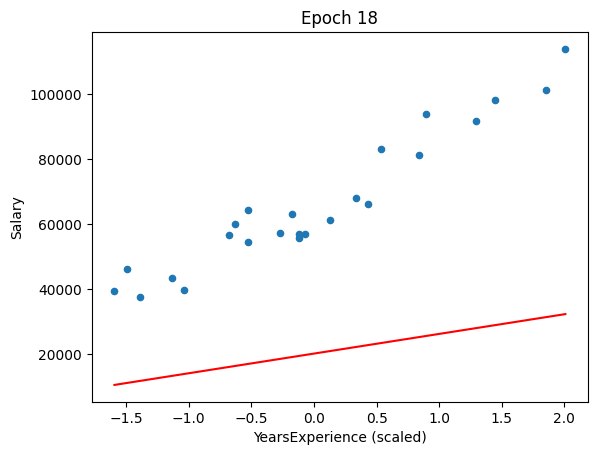

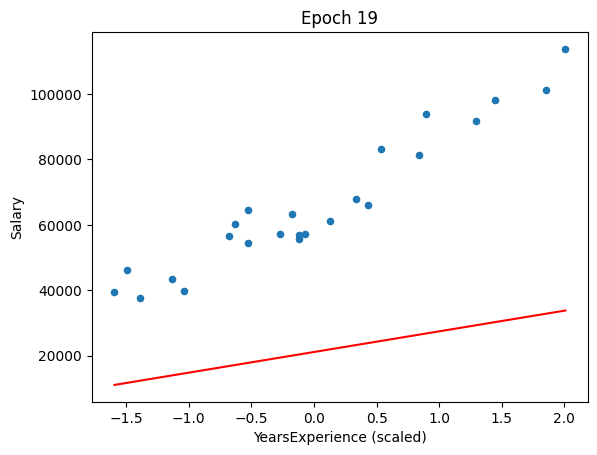

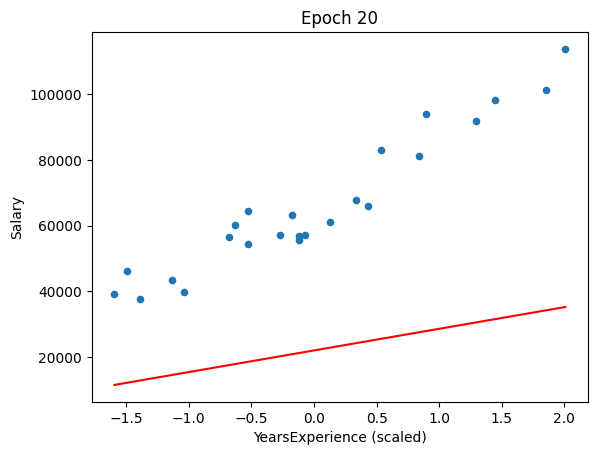

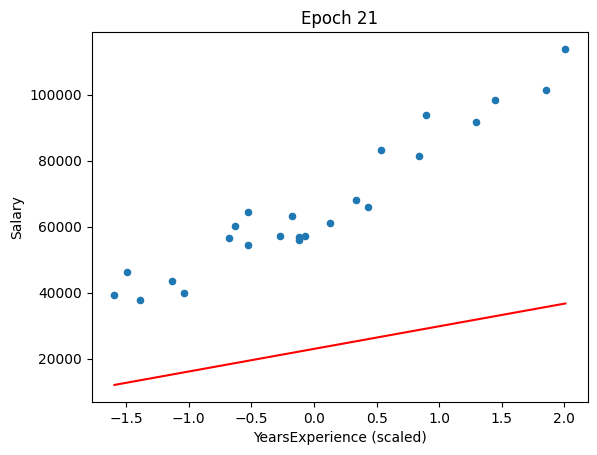

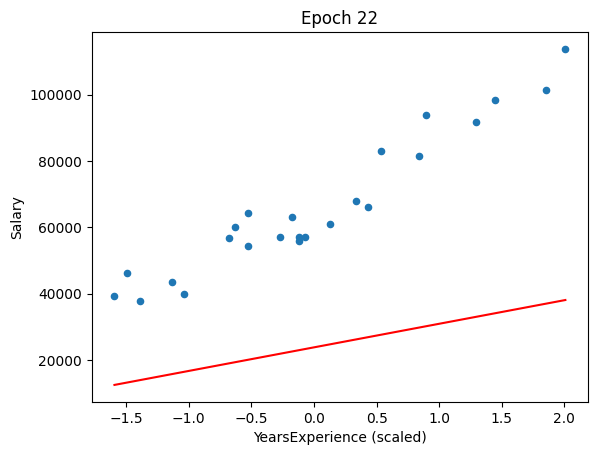

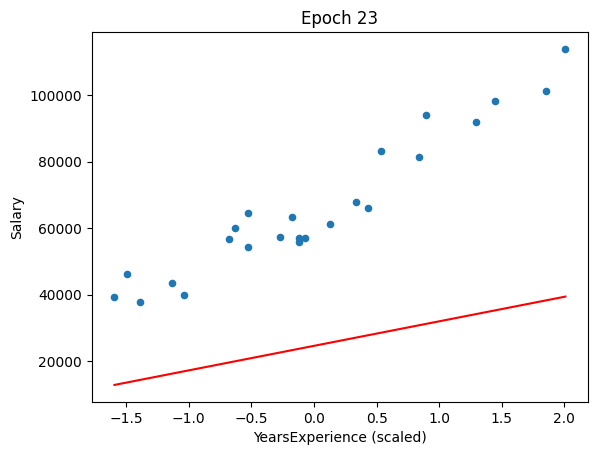

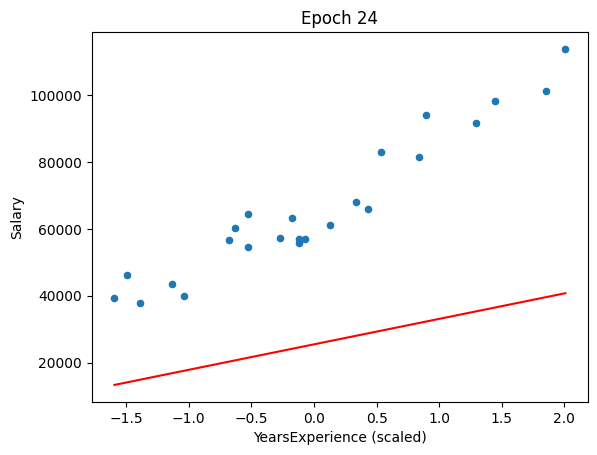

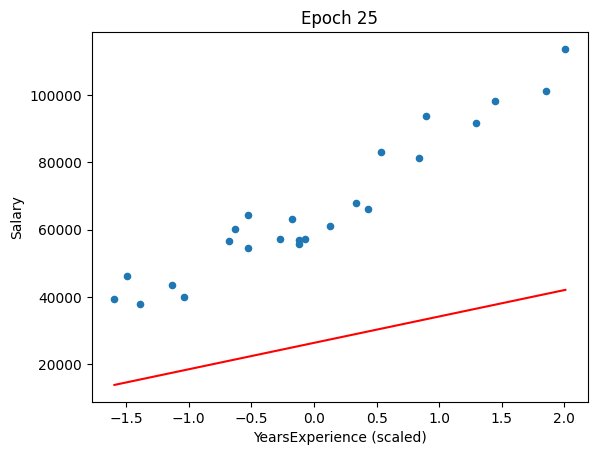

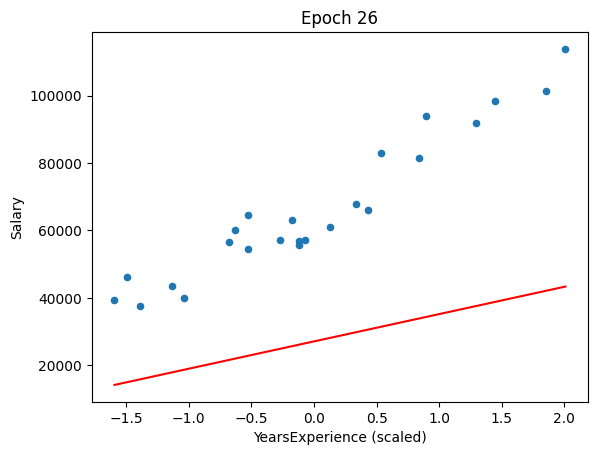

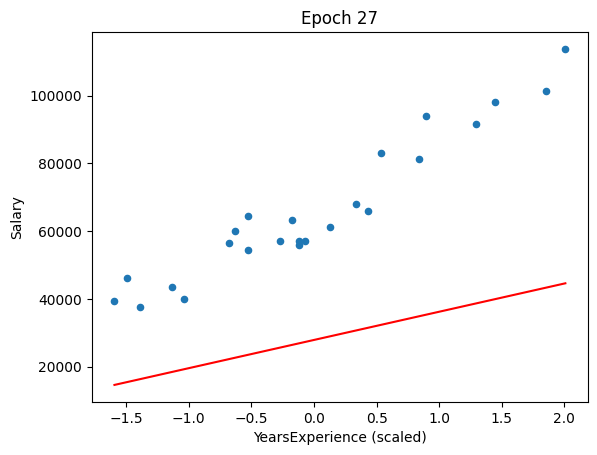

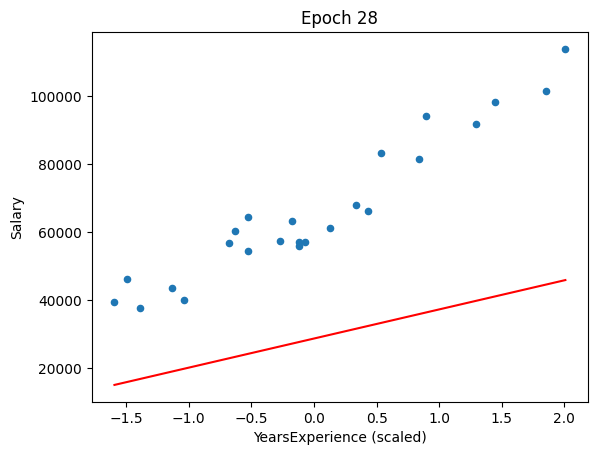

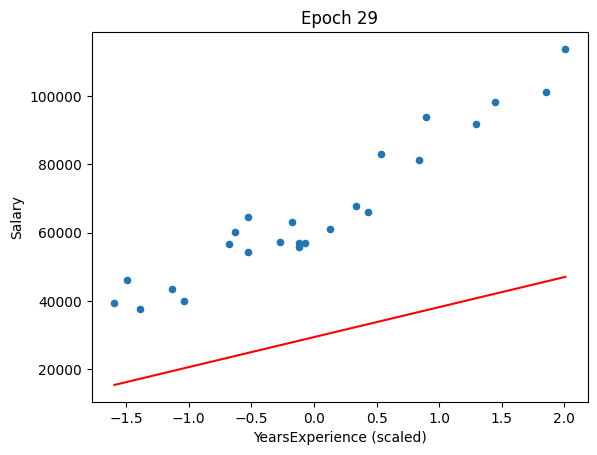

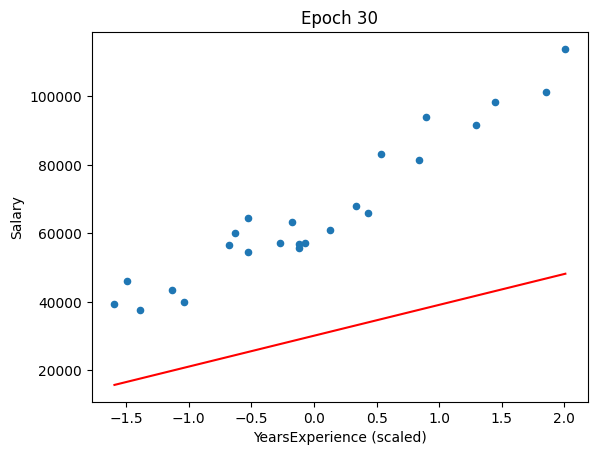

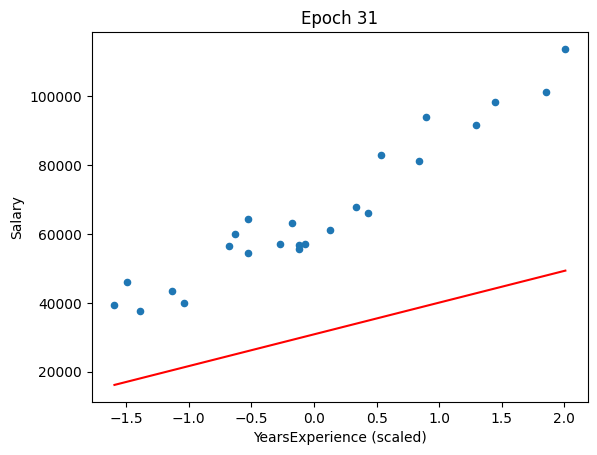

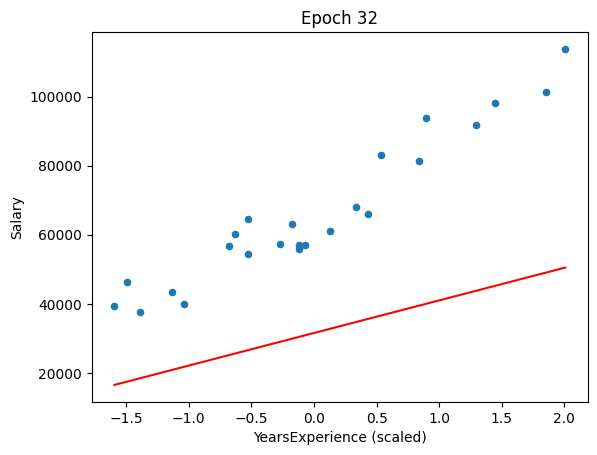

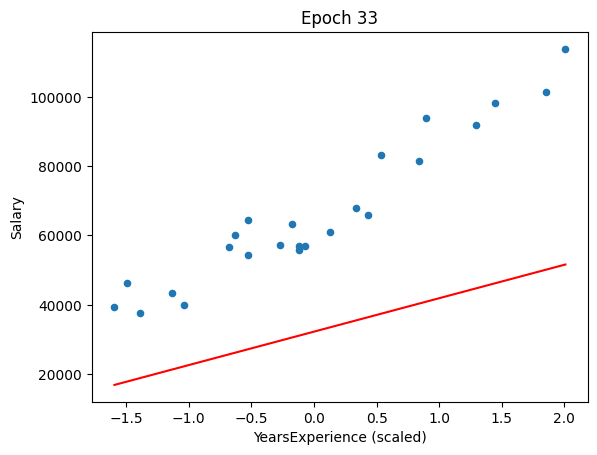

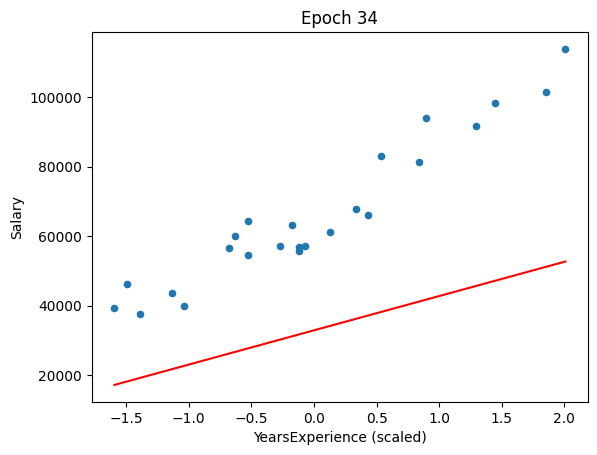

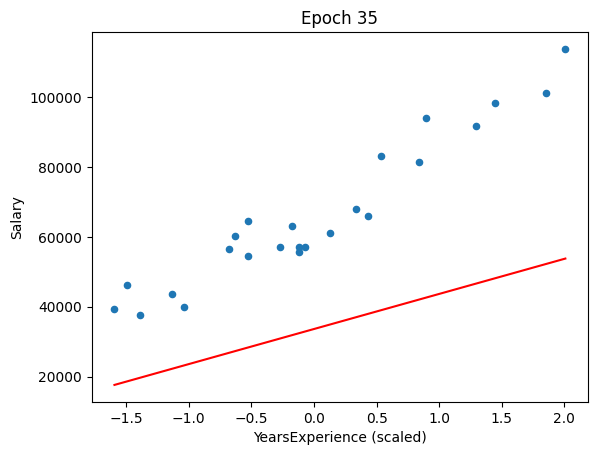

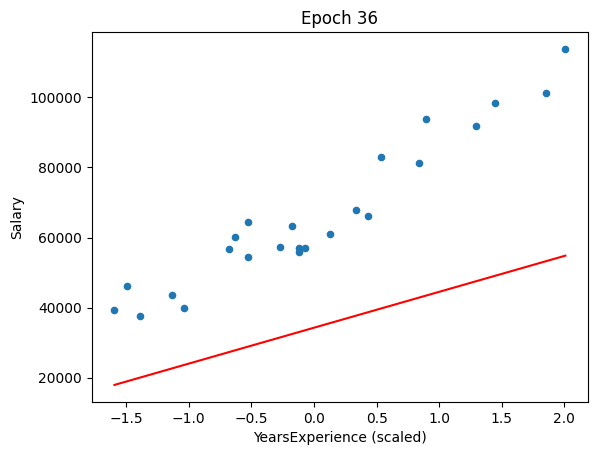

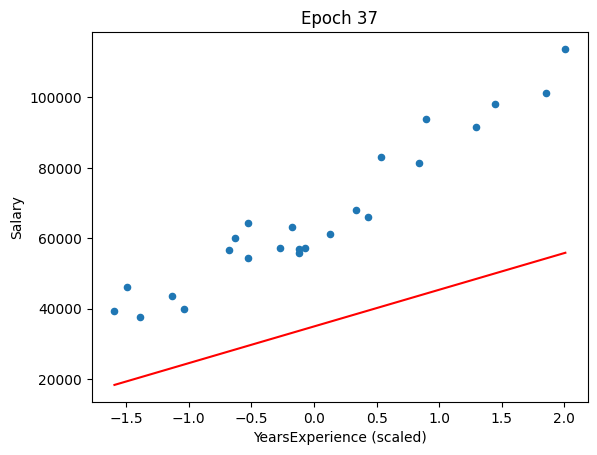

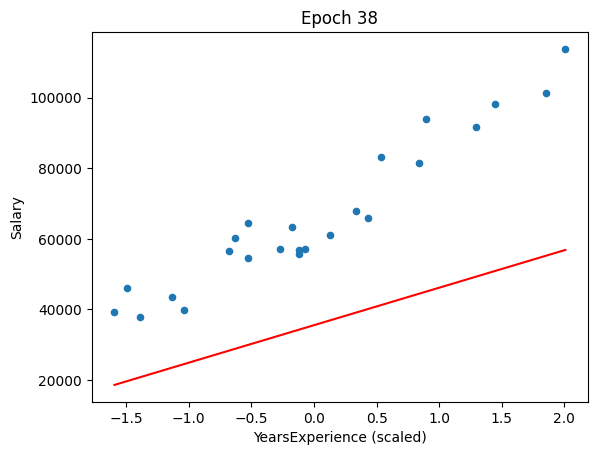

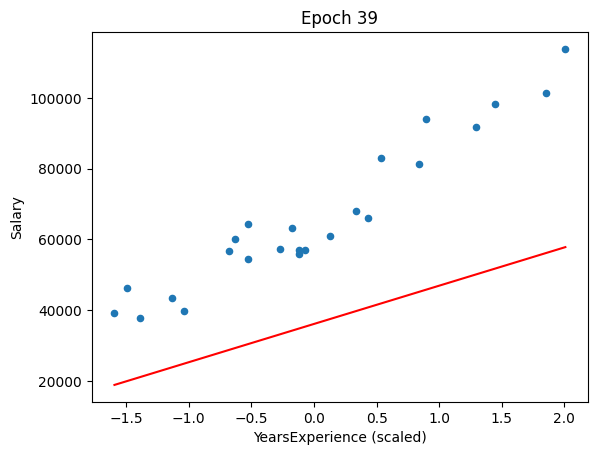

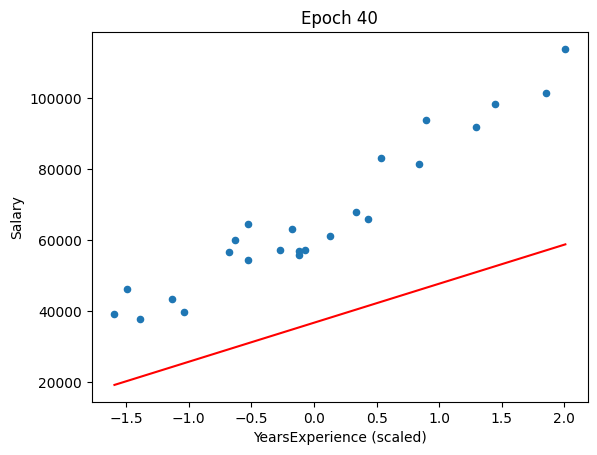

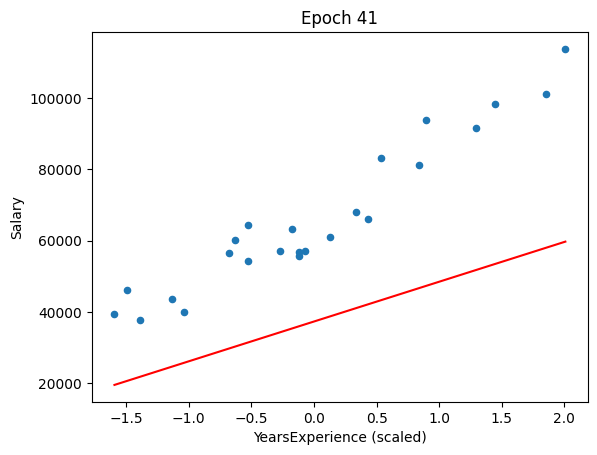

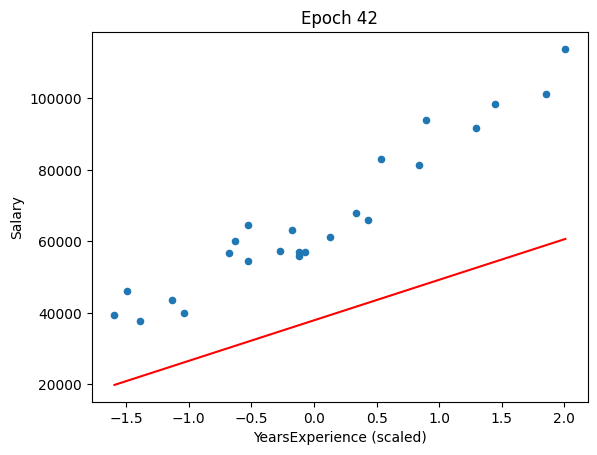

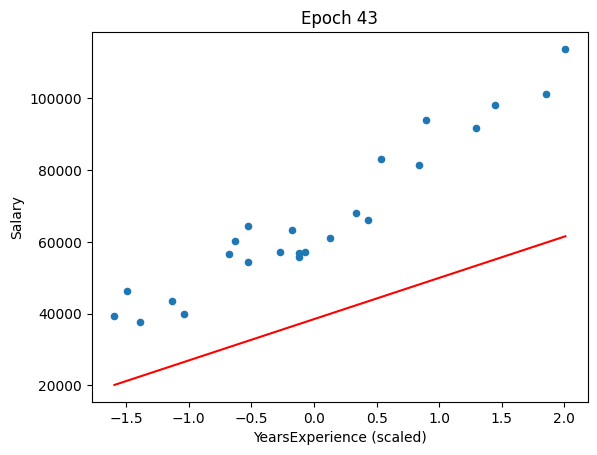

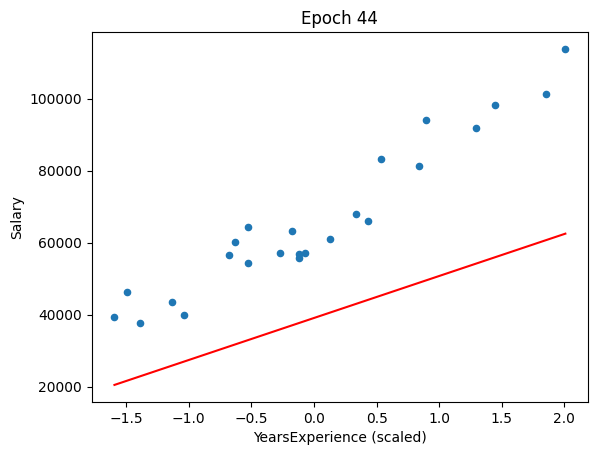

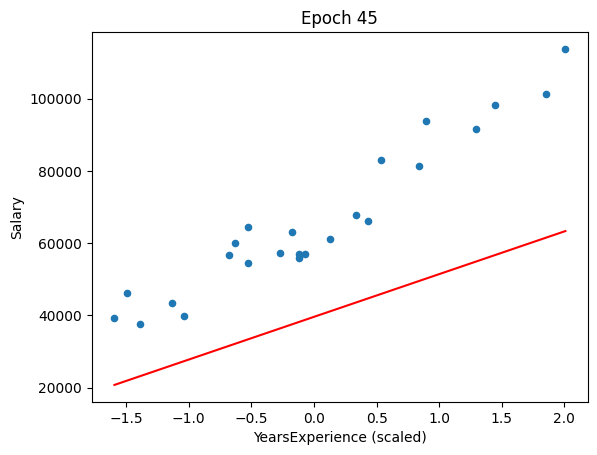

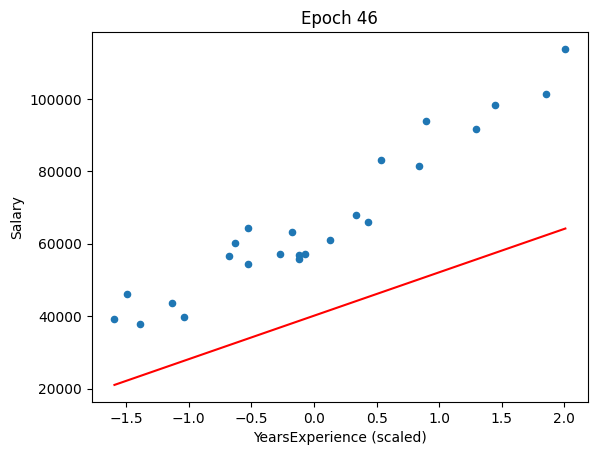

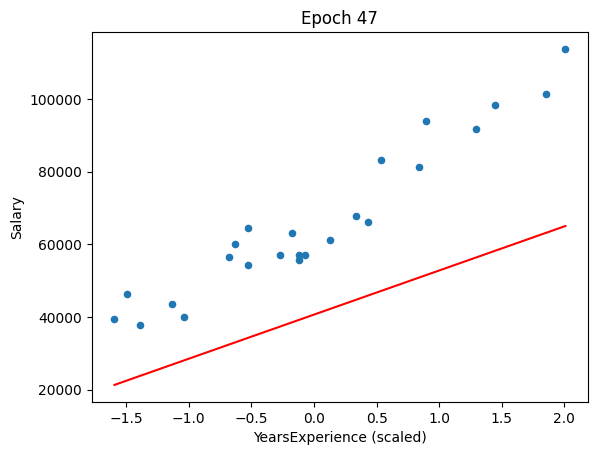

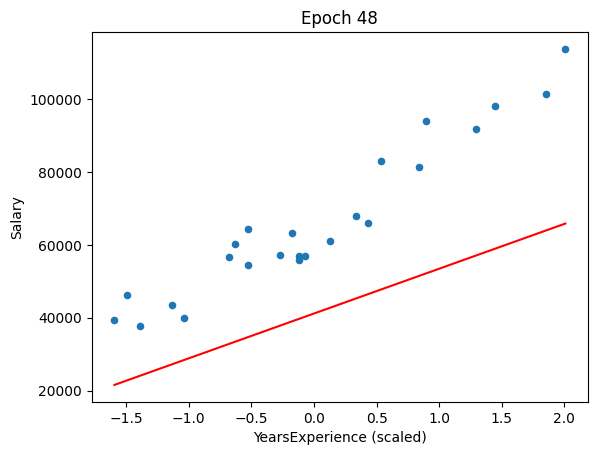

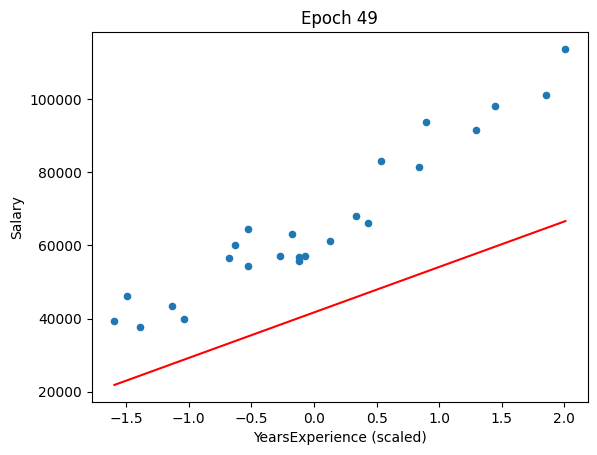

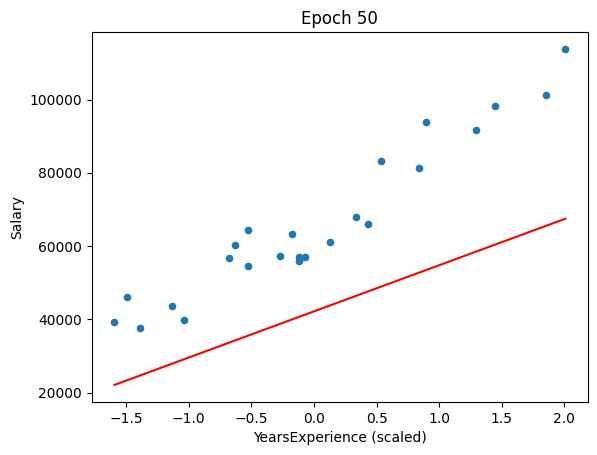

In [10]:
lr = 0.01
epochs = 100
w, b, ws, bs, costs = gradient_descent(X_train_s, y_train, lr, epochs)

for i in range(epochs):
    plt.clf()
    plt.scatter(X_train_s, y_train, s=20)
    x_line = np.linspace(X_train_s.min(), X_train_s.max(), 100)
    y_line = predict(x_line, ws[i], bs[i])
    plt.plot(x_line, y_line, color='red')
    plt.xlabel('YearsExperience (scaled)')
    plt.ylabel('Salary')
    plt.title(f'Epoch {i+1}')
    plt.pause(0.01)
plt.show()


In [8]:
y_train_pred = predict(X_train_s, w, b)
y_test_pred = predict(X_test_s, w, b)

train_mse = mse(y_train, y_train_pred)
test_mse = mse(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Train MSE:', train_mse)
print('Test MSE:', test_mse)
print('Train R2:', train_r2)
print('Test R2:', test_r2)


Train MSE: 119334984.65575366
Test MSE: 118467154.71850894
Train R2: 0.721053345958194
Test R2: -2.0794035771101678


In [9]:
lrs = [0.001, 0.01, 0.05]
epochs_list = [50, 100, 300]

best_r2 = -1e9
best_params = None

for lr_ in lrs:
    for ep_ in epochs_list:
        w_t, b_t, _, _, _ = gradient_descent(X_train_s, y_train, lr_, ep_)
        y_test_pred_t = predict(X_test_s, w_t, b_t)
        r2_t = r2_score(y_test, y_test_pred_t)
        if r2_t > best_r2:
            best_r2 = r2_t
            best_params = (lr_, ep_, w_t, b_t)

best_lr, best_epochs, best_w, best_b = best_params

print('Best lr:', best_lr)
print('Best epochs:', best_epochs)
print('Best test R2:', best_r2)

# Final evaluation with best model
y_train_pred_best = predict(X_train_s, best_w, best_b)
y_test_pred_best = predict(X_test_s, best_w, best_b)

print('Final Train MSE:', mse(y_train, y_train_pred_best))
print('Final Test MSE:', mse(y_test, y_test_pred_best))
print('Final Train R2:', r2_score(y_train, y_train_pred_best))
print('Final Test R2:', r2_score(y_test, y_test_pred_best))


Best lr: 0.05
Best epochs: 50
Best test R2: 0.23404080888560685
Final Train MSE: 35243437.33374272
Final Test MSE: 29467071.70060758
Final Train R2: 0.9176181322724493
Final Test R2: 0.23404080888560685
